<a href="https://colab.research.google.com/github/tawfeeq6719/Mielage-Prediction/blob/main/MielagePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Mielage Prediction**

Objective:

 The objective of the code is to build a mileage prediction model.

Data Source:

The dataset used for the model is obtained from the following source: https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv

Import Library:

In [40]:
import pandas as pd

In [41]:
import numpy as np

In [42]:
import seaborn as sns

In [43]:
import matplotlib.pyplot as plt

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

Import Data:

In [50]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

Describe Data:

In [51]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [52]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [54]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [55]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Data Visualization:

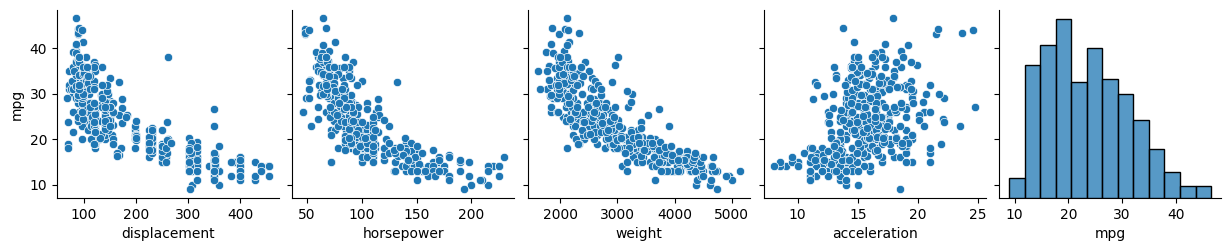

In [56]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration',	'mpg'], y_vars=['mpg']);

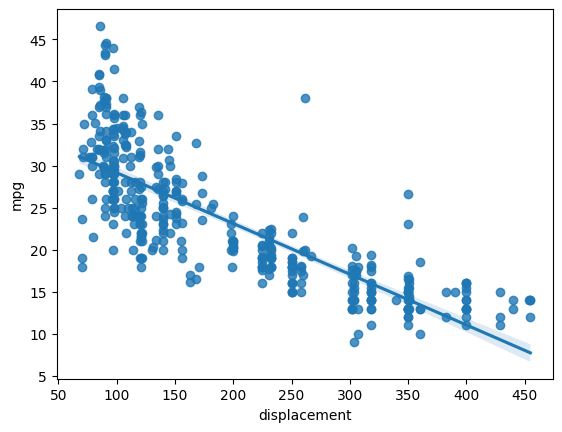

In [57]:
sns.regplot(x = 'displacement', y = 'mpg', data = df);

Data Preprocessing:

In [58]:
df = df.dropna()

In [59]:
ss = StandardScaler()

Define Target Variable (y) and Feature Variables (X):

In [60]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [61]:
y = df['mpg']

In [62]:
y.shape

(392,)

In [63]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [64]:
X = ss.fit_transform(X)

In [65]:
X.shape

(392, 4)

In [66]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


Train Test Split:

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2529)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

Modeling:

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
lr.intercept_

23.485738559737584

In [72]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

Prediction :

In [73]:
y_pred = lr.predict(X_test)

In [74]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

In [75]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [76]:
X_train2 = poly.fit_transform(X_train)

In [77]:
X_test2 = poly.fit_transform(X_test)

In [78]:
lr.fit(X_train2, y_train)

LinearRegression()

In [79]:
y_pred_poly = lr.predict(X_test2)

In [80]:
lr.intercept_

21.27336450063766

In [81]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

model evaluation :

In [82]:
r2_score(y_test, y_pred)

0.7031250746717691

In [83]:
mean_absolute_percentage_error(y_test, y_pred)

0.14713035779536746

In [84]:
mean_absolute_error(y_test, y_pred)

3.3286968643244106

In [85]:
mean_absolute_error(y_test, y_pred_poly)

2.7887147720295977

In [86]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12074018342938687

In [87]:
r2_score(y_test, y_pred_poly)

0.7461731314563803

Explanation:

1.The code aims to build a mileage prediction model using linear regression.

2.The dataset is loaded from a provided URL using pd.read_csv().

3.Data exploration is performed to gain insights into the dataset, including checking the first few rows, the number of unique values, data types, and missing values.

4.Data visualization is conducted using scatter plots and regression plots to understand the relationships between variables.

5.Data preprocessing is carried out by dropping rows with missing values and standardizing the feature variables.

6.The target variable ('mpg') and feature variables ('displacement', 'horsepower', 'weight', 'acceleration') are defined.

7.The dataset is split into training and testing sets with a 70:30 ratio using train_test_split().

8.A linear regression model is created using LinearRegression() and trained on the training data using fit().

9.The model's performance is evaluated on the testing data using metrics such as mean absolute error, mean absolute percentage error, and R-squared score.

10.To enhance the model, polynomial features with degree 2 and interaction terms are created using PolynomialFeatures().

11.The transformed features are used to train the linear regression model again.

12.Predictions are made on the transformed testing data.

13.The performance of the polynomial model is evaluated using the same metrics as before.

The code provides insights into the data, builds and evaluates a linear regression model, and enhances it by introducing polynomial features.